## Assignment 3 - model - group 28

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score


**Collecting the data**

In [2]:
# Importing Dataset

data = pd.read_csv("recruitmentdataset-2022-1.3.csv")

**Describe the data**

In [3]:
# Test printing

data.head(10)

,Id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
0,x8011e,female,24,German,Swimming,70,False,False,False,False,1,True,phd,A,True
1,x6077a,male,26,German,Golf,67,False,True,False,False,2,True,bachelor,A,False
2,x6006e,female,23,Dutch,Running,67,False,True,True,False,0,True,master,A,False
3,x2173b,male,24,Dutch,Cricket,70,False,True,False,False,1,True,master,A,True
4,x6241a,female,26,German,Golf,59,False,False,False,False,1,False,master,A,True
5,x9063d,female,26,Dutch,Chess,63,False,False,False,False,1,True,bachelor,A,True
6,x5785d,female,27,Dutch,Tennis,63,True,True,False,False,2,True,bachelor,A,False
7,x8767c,female,22,Dutch,Swimming,71,False,True,False,False,1,True,master,A,True
8,x6541b,female,28,Dutch,Football,65,True,False,False,True,3,False,bachelor,A,False
9,x3890b,male,24,Dutch,Football,55,True,False,False,True,3,False,master,A,True


In [4]:
df_company = data[data['company']=='A']
df_company

,Id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
0,x8011e,female,24,German,Swimming,70,False,False,False,False,1,True,phd,A,True
1,x6077a,male,26,German,Golf,67,False,True,False,False,2,True,bachelor,A,False
2,x6006e,female,23,Dutch,Running,67,False,True,True,False,0,True,master,A,False
3,x2173b,male,24,Dutch,Cricket,70,False,True,False,False,1,True,master,A,True
4,x6241a,female,26,German,Golf,59,False,False,False,False,1,False,master,A,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,x2659d,male,30,Dutch,Tennis,54,True,False,False,True,2,False,bachelor,A,False
996,x5868g,male,22,Dutch,Running,69,False,True,False,False,1,True,bachelor,A,False
997,x3164f,male,28,Dutch,Cricket,57,False,False,False,False,1,False,bachelor,A,False
998,x6907b,male,25,Dutch,Tennis,65,False,True,False,False,1,True,master,A,False


In [5]:
filtered_df = df_company[df_company['sport'].str.contains('Swimming|Golf|Football', case=False)]

In [6]:
filtered_df.head(10)

,Id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
0,x8011e,female,24,German,Swimming,70,False,False,False,False,1,True,phd,A,True
1,x6077a,male,26,German,Golf,67,False,True,False,False,2,True,bachelor,A,False
4,x6241a,female,26,German,Golf,59,False,False,False,False,1,False,master,A,True
7,x8767c,female,22,Dutch,Swimming,71,False,True,False,False,1,True,master,A,True
8,x6541b,female,28,Dutch,Football,65,True,False,False,True,3,False,bachelor,A,False
9,x3890b,male,24,Dutch,Football,55,True,False,False,True,3,False,master,A,True
10,x9775f,female,27,Dutch,Football,61,False,False,False,False,1,True,bachelor,A,False
11,x3562f,male,28,Dutch,Football,56,False,False,False,True,2,False,bachelor,A,True
12,x4044c,female,27,German,Football,62,False,True,False,False,1,True,bachelor,A,False
13,x9428d,male,26,Dutch,Football,56,False,False,False,False,1,False,bachelor,A,False


In [7]:
filtered_df.shape

(492, 15)

In [8]:
filtered_df.describe()

,age,ind-university_grade,ind-languages
count,492.000000,492.000000,492.000000
mean,26.247967,61.833333,1.392276
std,2.602579,5.853321,0.848253
min,21.000000,47.000000,0.000000
25%,24.000000,58.000000,1.000000
50%,26.000000,62.000000,1.000000
75%,28.000000,66.000000,2.000000
max,32.000000,77.000000,3.000000


In [9]:
sport_counts = filtered_df['sport'].value_counts()
sport_counts

Football    243
Swimming    163
Golf         86
Name: sport, dtype: int64

In [10]:
nationality_counts = filtered_df['nationality'].value_counts()
nationality_counts

Dutch      367
German      68
Belgian     57
Name: nationality, dtype: int64

In [11]:
hired_counts = filtered_df['decision'].value_counts()
hired_counts

False    277
True     215
Name: decision, dtype: int64

In [12]:
degree_counts = filtered_df['ind-degree'].value_counts()
degree_counts

bachelor    260
master      205
phd          27
Name: ind-degree, dtype: int64

In [13]:
gender_counts = filtered_df['gender'].value_counts()
gender_counts

male      267
female    217
other       8
Name: gender, dtype: int64

In [14]:
languages_counts = filtered_df['ind-languages'].value_counts()
languages_counts

1    210
2    164
0     69
3     49
Name: ind-languages, dtype: int64

**Explore the data**

In [15]:
df = filtered_df

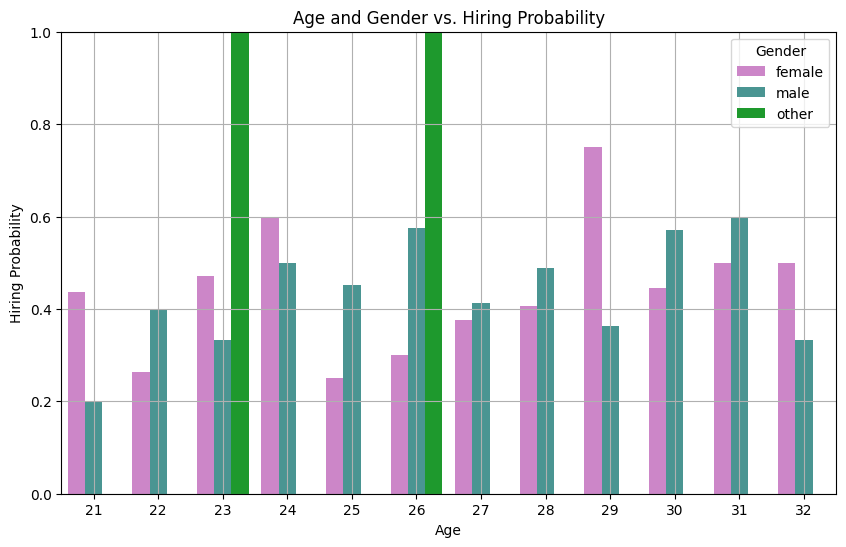

In [16]:
hired_probability = df.groupby(['age', 'gender'])['decision'].mean().reset_index()
plt.figure(figsize=(10, 6))
custom_palette = {'male': '#3EA19E', 'female': '#D87AD3', 'other': '#09AD1D'}
sns.barplot(x='age', y='decision', hue='gender', data=hired_probability, palette=custom_palette)
plt.title('Age and Gender vs. Hiring Probability')
plt.xlabel('Age')
plt.ylabel('Hiring Probability')
plt.legend(title='Gender', loc='upper right')
plt.ylim(0, 1.0)
plt.grid(True)
plt.show()

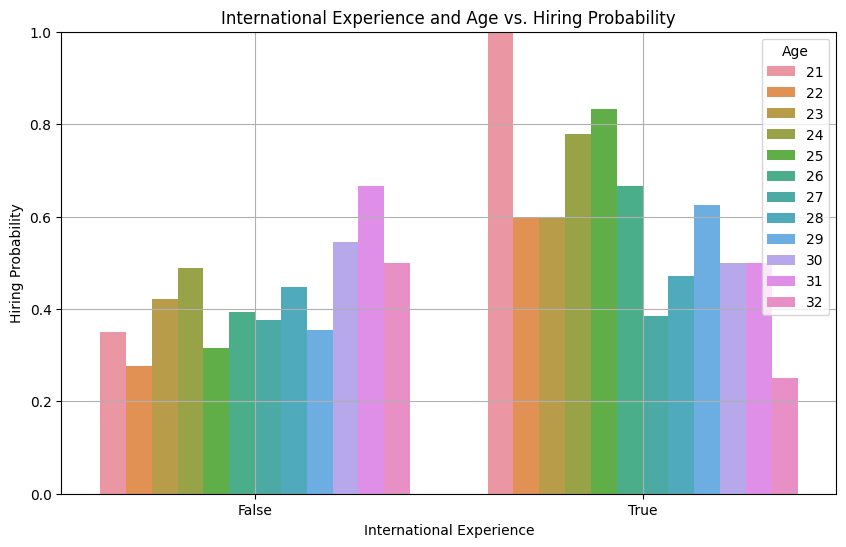

In [17]:
hired_probability = df.groupby(['ind-international_exp', 'age'])['decision'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='ind-international_exp', y='decision', hue='age', data=hired_probability)
plt.title('International Experience and Age vs. Hiring Probability')
plt.xlabel('International Experience')
plt.ylabel('Hiring Probability')
plt.legend(title='Age', loc='upper right')
plt.ylim(0, 1.0)
plt.grid(True)
plt.show()

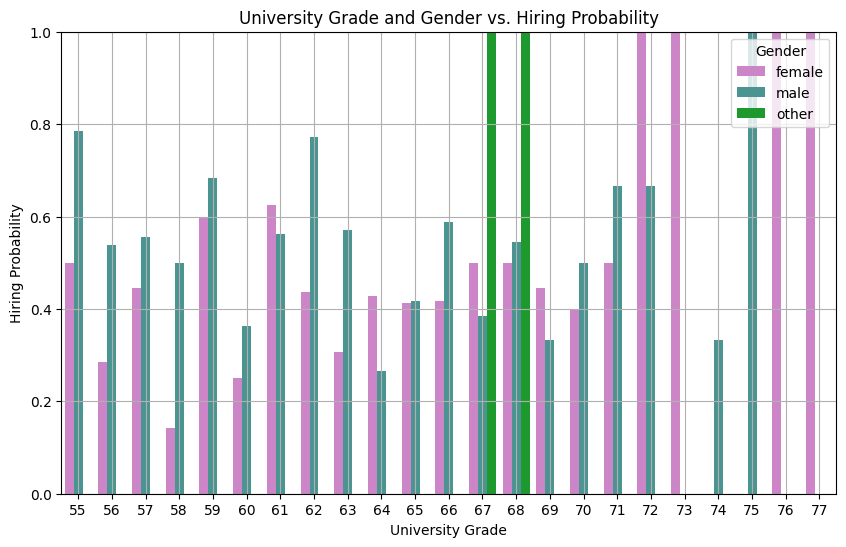

In [18]:
filtered_df1 = df[df['ind-university_grade'] >= 55]
hired_probability = filtered_df1.groupby(['ind-university_grade', 'gender'])['decision'].mean().reset_index()
custom_palette = {'male': '#3EA19E', 'female': '#D87AD3', 'other': '#09AD1D'}
plt.figure(figsize=(10, 6))
sns.barplot(x='ind-university_grade', y='decision', hue='gender', data=hired_probability, palette=custom_palette)
plt.title('University Grade and Gender vs. Hiring Probability')
plt.xlabel('University Grade')
plt.ylabel('Hiring Probability')
plt.legend(title='Gender', loc='upper right')
plt.ylim(0, 1.0)
plt.grid(True)
plt.show()

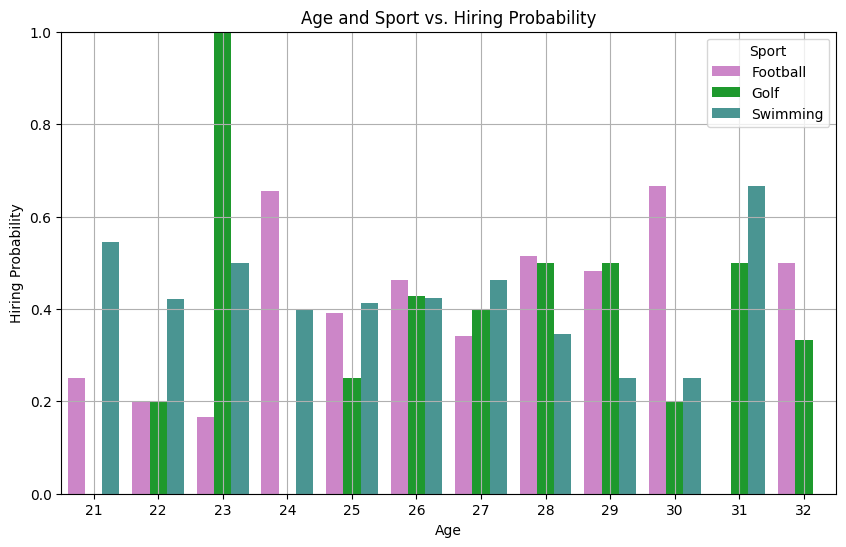

In [19]:
hired_probability = df.groupby(['age', 'sport'])['decision'].mean().reset_index()
plt.figure(figsize=(10, 6))
custom_palette = {'Swimming': '#3EA19E', 'Football': '#D87AD3', 'Golf': '#09AD1D'}
sns.barplot(x='age', y='decision', hue='sport', data=hired_probability, palette=custom_palette)
plt.title('Age and Sport vs. Hiring Probability')
plt.xlabel('Age')
plt.ylabel('Hiring Probability')
plt.legend(title='Sport', loc='upper right')
plt.ylim(0, 1.0)
plt.grid(True)
plt.show()

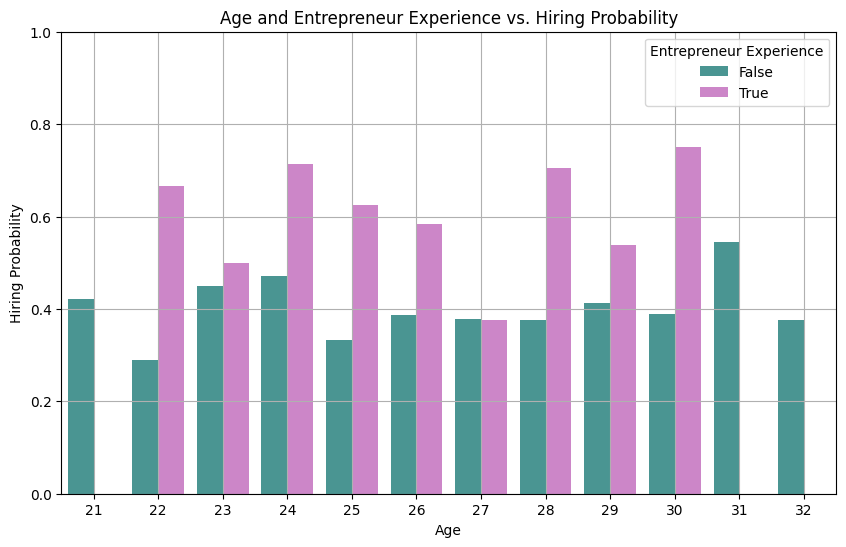

In [20]:
hired_probability = df.groupby(['age', 'ind-entrepeneur_exp'])['decision'].mean().reset_index()
plt.figure(figsize=(10, 6))
custom_palette = ['#3EA19E', '#D87AD3']
sns.barplot(x='age', y='decision', hue='ind-entrepeneur_exp', data=hired_probability, palette=custom_palette)
plt.title('Age and Entrepreneur Experience vs. Hiring Probability')
plt.xlabel('Age')
plt.ylabel('Hiring Probability')
plt.legend(title='Entrepreneur Experience', loc='upper right')
plt.ylim(0, 1.0)
plt.grid(True)
plt.show()

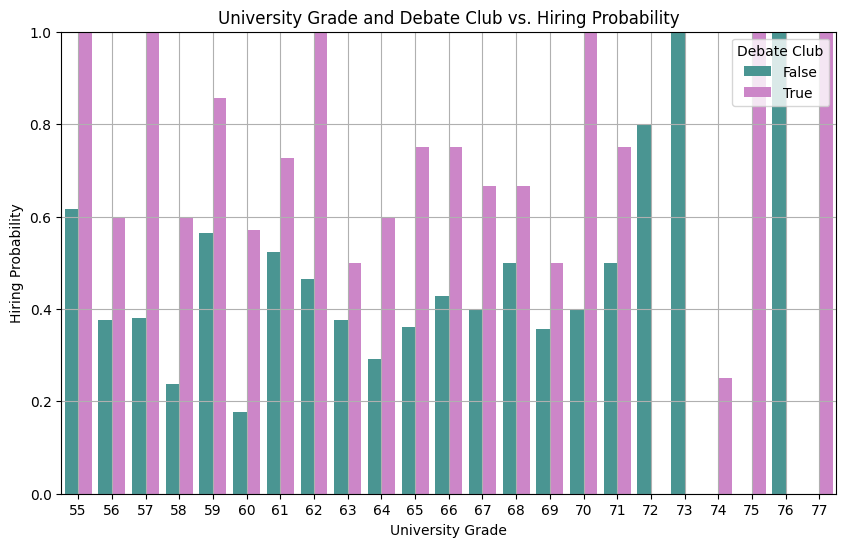

In [21]:
filtered_df1 = df[df['ind-university_grade'] >= 55]
hired_probability = filtered_df1.groupby(['ind-debateclub', 'ind-university_grade'])['decision'].mean().reset_index()
plt.figure(figsize=(10, 6))
custom_palette = ['#3EA19E', '#D87AD3']
sns.barplot(x='ind-university_grade', y='decision', hue='ind-debateclub', data=hired_probability, palette=custom_palette)
plt.title('University Grade and Debate Club vs. Hiring Probability')
plt.xlabel('University Grade')
plt.ylabel('Hiring Probability')
plt.legend(title='Debate Club', loc='upper right')
plt.ylim(0, 1.0)
plt.grid(True)
plt.show()

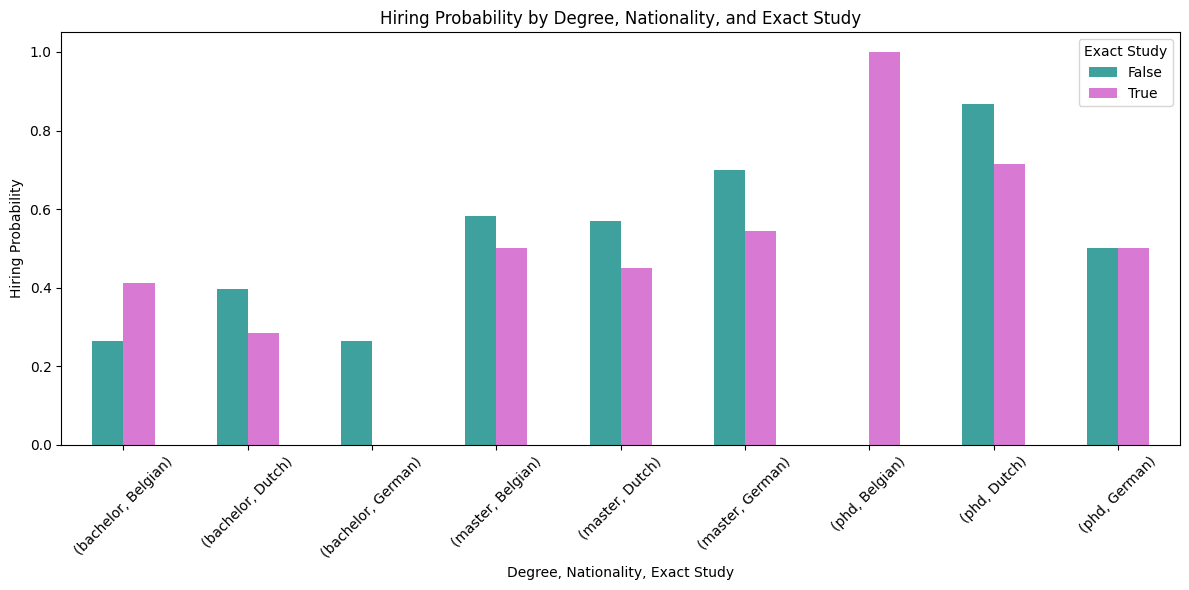

In [22]:
grouped = df.groupby(['ind-degree', 'nationality', 'ind-exact_study'])['decision'].mean().unstack()

colors = ["#3EA19E", "#D87AD3"]

fig, ax = plt.subplots(figsize=(12, 6))
grouped.plot(kind='bar', ax=ax, color=colors)
plt.xlabel('Degree, Nationality, Exact Study')
plt.ylabel('Hiring Probability')
plt.title('Hiring Probability by Degree, Nationality, and Exact Study')
plt.xticks(rotation=45)
plt.legend(title='Exact Study', labels=['False', 'True'])
plt.tight_layout()
plt.show()

**Data Preparation**

**Modelling the data**

In [23]:
df_train, df_test = skl.model_selection.train_test_split(filtered_df, test_size=0.20, random_state=9, shuffle=True)
df_train, df_val = skl.model_selection.train_test_split(df_train, test_size=0.20, random_state=9, shuffle=True)
df_train.head()

,Id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
548,x6445e,female,26,German,Golf,56,False,False,False,False,1,False,bachelor,A,False
613,x9736a,male,21,Dutch,Golf,64,False,True,False,True,2,True,bachelor,A,False
475,x7139e,male,32,Dutch,Golf,65,False,False,True,False,0,True,master,A,False
894,x3914e,male,30,Dutch,Football,59,False,False,False,True,2,False,bachelor,A,True
150,x8983a,female,24,Dutch,Football,64,False,False,False,False,2,True,bachelor,A,True


In [24]:
X_train = df_train[['gender','age', 'nationality', 'sport', 'ind-university_grade', 'ind-debateclub', 'ind-programming_exp',	'ind-international_exp', 	'ind-languages', 'ind-exact_study',	'ind-degree', 'company']]
y_train = df_train['decision']
X_val = df_val[['gender','age', 'nationality', 'sport', 'ind-university_grade', 'ind-debateclub', 'ind-programming_exp',	'ind-international_exp', 	'ind-languages', 'ind-exact_study',	'ind-degree', 'company']]
y_val = df_val['decision']
X_test = df_test[['gender','age', 'nationality', 'sport', 'ind-university_grade', 'ind-debateclub', 'ind-programming_exp',	'ind-international_exp', 	'ind-languages', 'ind-exact_study',	'ind-degree', 'company']]
y_test = df_test['decision']

In [25]:
# Define preprocessing steps
categorical_features = ['sport', 'ind-degree', 'ind-exact_study', 'ind-debateclub', 'ind-programming_exp', 'ind-international_exp']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_features = ['ind-university_grade', 'ind-languages']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine preprocessing steps
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier())])

In [26]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['ind-university_grade',
                                                   'ind-languages']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sport', 'ind-degree',
                                                   'ind-exact_study',
                                                   'ind-debateclub',
                                                   'ind-programming_exp',
                                                   'ind-international_exp'])])),
                ('classifier', DecisionTreeClassifier())])

In [27]:
# Define hyperparameters to search
param_grid = {
    'classifier__max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'classifier__min_samples_split': [2, 5, 6, 10, 13, 15]  ,
    'classifier__min_samples_leaf': [1, 2, 4],
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_classifier = grid_search.best_estimator_.named_steps['classifier']
print(best_classifier)

DecisionTreeClassifier(max_depth=12, min_samples_split=6)


Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.93      0.92       182
        True       0.90      0.89      0.89       132

    accuracy                           0.91       314
   macro avg       0.91      0.91      0.91       314
weighted avg       0.91      0.91      0.91       314

Precision: 0.90
Recall: 0.89
F1-score: 0.89


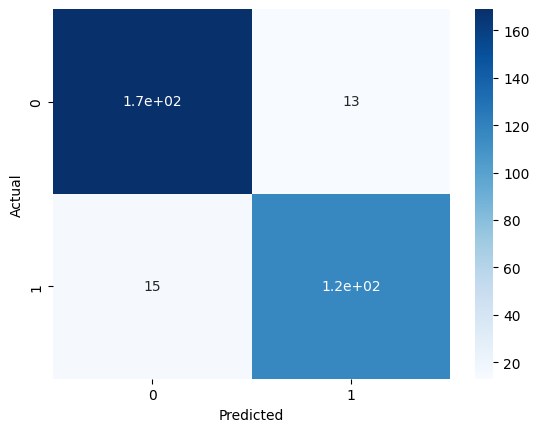

In [28]:
# Make predictions on the training set
y_pred = grid_search.predict(X_train)

# Generate a classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_train, y_pred))

conf_matrix = confusion_matrix(y_train, y_pred)
# Calculate precision, recall, and F1-score
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the results
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1_score))

sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Classification Report:
              precision    recall  f1-score   support

       False       0.75      0.77      0.76        43
        True       0.71      0.69      0.70        36

    accuracy                           0.73        79
   macro avg       0.73      0.73      0.73        79
weighted avg       0.73      0.73      0.73        79

Precision: 0.71
Recall: 0.69
F1-score: 0.70


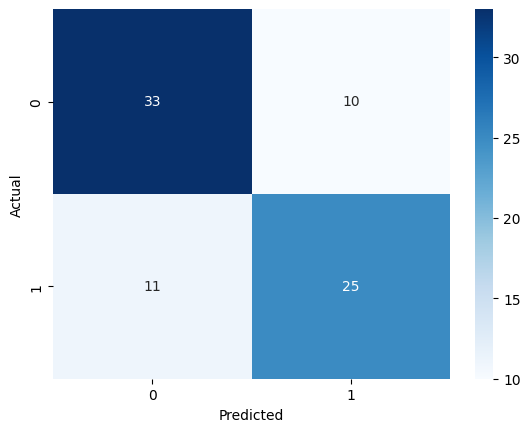

In [29]:
# Make predictions on the validation set
y_pred = grid_search.predict(X_val)

# Generate a classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_val, y_pred))

conf_matrix = confusion_matrix(y_val, y_pred)
# Calculate precision, recall, and F1-score
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the results
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1_score))


sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [30]:


# Define a range of maximum depths to test
max_depths = np.arange(1, 16)  # You can adjust the range as needed
min_samples_split_values = [2, 5, 6, 10, 13, 15]  
min_samples_leaf_values = [1, 2, 4]

# Initialize lists to store mean cross-validation scores for each depth
mean_scores_depth = []

# Iterate over different maximum depths
for depth in max_depths:
    # Create a decision tree classifier with the current depth
    classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)

    # Create a pipeline with the current classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', classifier)])

    # Perform cross-validation (adjust cv parameter as needed)
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1')

    # Compute the mean score for this depth
    mean_score = np.mean(scores)
    mean_scores_depth.append(mean_score)

mean_scores_samples = []

# Iterate over different maximum depths
for depth in max_depths:
    # Create a decision tree classifier with the current depth
    classifier = DecisionTreeClassifier(min_samples_split=depth, random_state=42)

    # Create a pipeline with the current classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', classifier)])

    # Perform cross-validation (adjust cv parameter as needed)
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1')

    # Compute the mean score for this depth
    mean_score = np.mean(scores)
    mean_scores_samples.append(mean_score)

mean_scores_leaves = []

# Iterate over different maximum depths
for depth in max_depths:
    # Create a decision tree classifier with the current depth
    classifier = DecisionTreeClassifier(min_samples_leaf=depth, random_state=42)

    # Create a pipeline with the current classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', classifier)])

    # Perform cross-validation (adjust cv parameter as needed)
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1')

    # Compute the mean score for this depth
    mean_score = np.mean(scores)
    mean_scores_leaves.append(mean_score)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_depths, mean_scores_depth, marker='o', linestyle='-', color='red', label='Max Depth')
plt.plot(max_depths, mean_scores_samples, marker='o', linestyle='-', color='blue', label='Min Samples Split')
plt.plot(max_depths, mean_scores_leaves, marker='o', linestyle='-', color='green', label='Min Samples Leaf')
plt.title('Decision Tree Hyperparameters vs. Performance')
plt.xlabel('Hyperparameters')
plt.ylabel('Mean F1 Score')
plt.legend()
plt.grid(True)
plt.show()

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\no\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\no\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\no\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\Users\no\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\no\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\no\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'min_samples_split' parameter of DecisionTreeClassifier must be an int in the range [2, inf) or a float in the range (0.0, 1.0]. Got 1 instead.


Classification Report:
              precision    recall  f1-score   support

       False       0.75      0.75      0.75        52
        True       0.72      0.72      0.72        47

    accuracy                           0.74        99
   macro avg       0.74      0.74      0.74        99
weighted avg       0.74      0.74      0.74        99

Precision: 0.72
Recall: 0.72
F1-score: 0.72


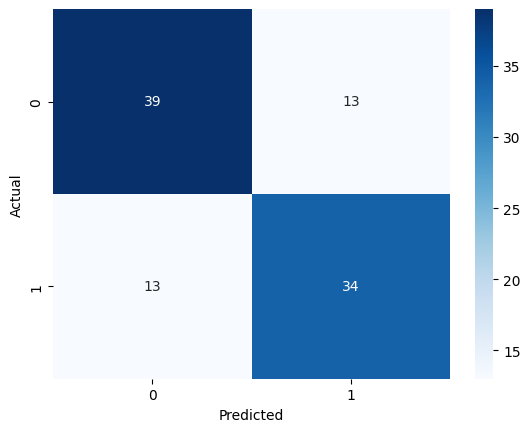

In [32]:
# Make predictions on the validation set
y_pred = grid_search.predict(X_test)

# Generate a classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
# Calculate precision, recall, and F1-score
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the results
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1_score))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Model Exploration**

In [33]:
# Using test data 

X_test["real"] = y_test
X_test["predicted"] = y_pred

C:\Users\no\AppData\Local\Temp\ipykernel_13480\3606468262.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["real"] = y_test
C:\Users\no\AppData\Local\Temp\ipykernel_13480\3606468262.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["predicted"] = y_pred


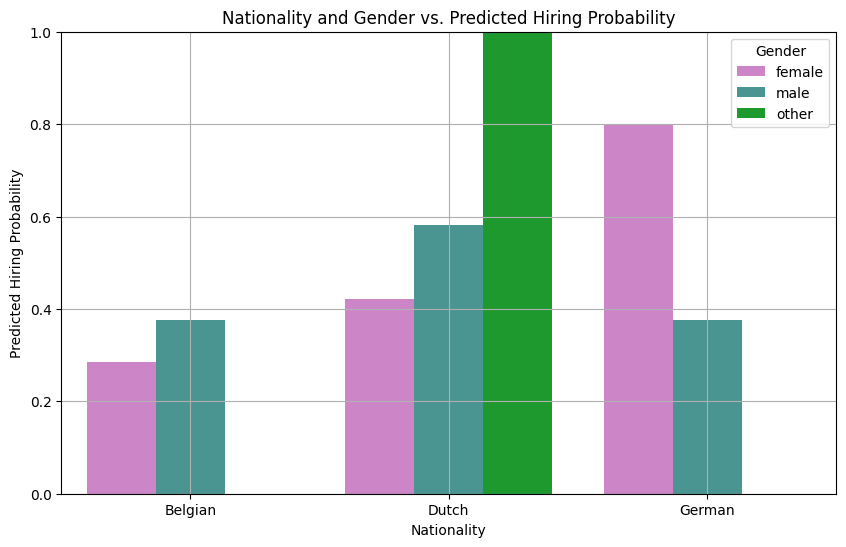

In [40]:
# Predicted hiring probability for different nationalities and genders

hired_probability = X_test.groupby(['nationality', 'gender'])['predicted'].mean().reset_index()
plt.figure(figsize=(10, 6))
custom_palette = {'male': '#3EA19E', 'female': '#D87AD3', 'other': '#09AD1D'}
sns.barplot(x='nationality', y='predicted', hue='gender', data=hired_probability, palette=custom_palette)
plt.title('Nationality and Gender vs. Predicted Hiring Probability')
plt.xlabel('Nationality')
plt.ylabel('Predicted Hiring Probability')
plt.legend(title='Gender', loc='upper right')
plt.ylim(0, 1.0)
plt.grid(True)
plt.show()

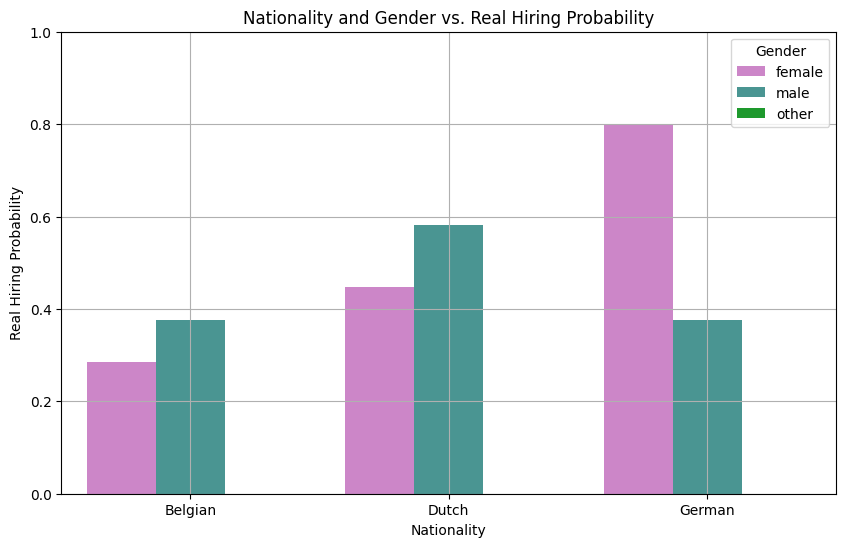

In [41]:
# Real hiring probability for different nationalities and genders

hired_probability = X_test.groupby(['nationality', 'gender'])['real'].mean().reset_index()
plt.figure(figsize=(10, 6))
custom_palette = {'male': '#3EA19E', 'female': '#D87AD3', 'other': '#09AD1D'}
sns.barplot(x='nationality', y='real', hue='gender', data=hired_probability, palette=custom_palette)
plt.title('Nationality and Gender vs. Real Hiring Probability')
plt.xlabel('Nationality')
plt.ylabel('Real Hiring Probability')
plt.legend(title='Gender', loc='upper right')
plt.ylim(0, 1.0)
plt.grid(True)
plt.show()

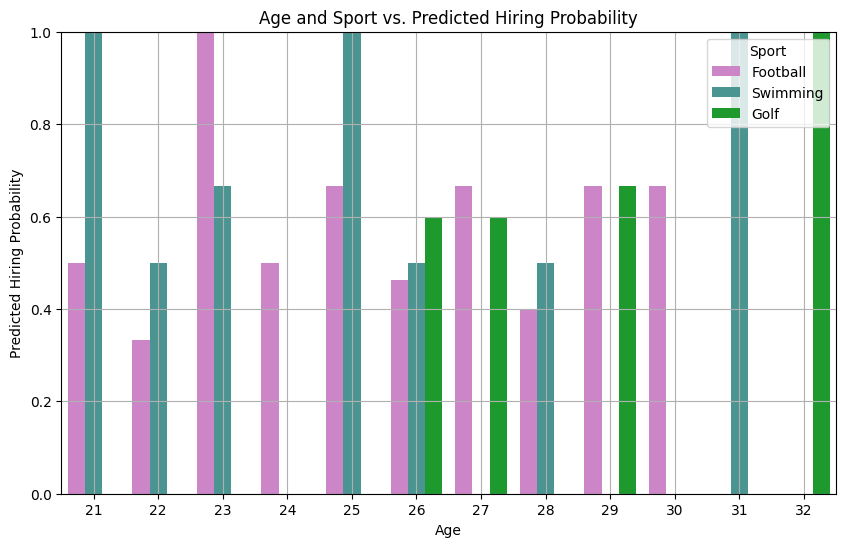

In [42]:
# Predicted hiring probability for different ages and preferred sports

hired_probability = X_test.groupby(['age', 'sport'])['predicted'].mean().reset_index()
plt.figure(figsize=(10, 6))
custom_palette = {'Swimming': '#3EA19E', 'Football': '#D87AD3', 'Golf': '#09AD1D'}
sns.barplot(x='age', y='predicted', hue='sport', data=hired_probability, palette=custom_palette)
plt.title('Age and Sport vs. Predicted Hiring Probability')
plt.xlabel('Age')
plt.ylabel('Predicted Hiring Probability')
plt.legend(title='Sport', loc='upper right')
plt.ylim(0, 1.0)
plt.grid(True)
plt.show()

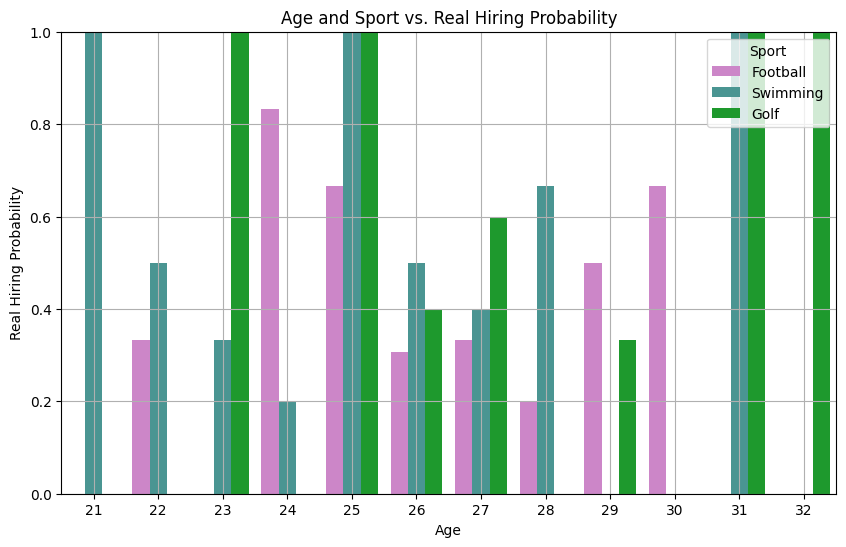

In [43]:
# Real hiring probability for different ages and preferred sports

hired_probability = X_test.groupby(['age', 'sport'])['real'].mean().reset_index()
plt.figure(figsize=(10, 6))
custom_palette = {'Swimming': '#3EA19E', 'Football': '#D87AD3', 'Golf': '#09AD1D'}
sns.barplot(x='age', y='real', hue='sport', data=hired_probability, palette=custom_palette)
plt.title('Age and Sport vs. Real Hiring Probability')
plt.xlabel('Age')
plt.ylabel('Real Hiring Probability')
plt.legend(title='Sport', loc='upper right')
plt.ylim(0, 1.0)
plt.grid(True)
plt.show()

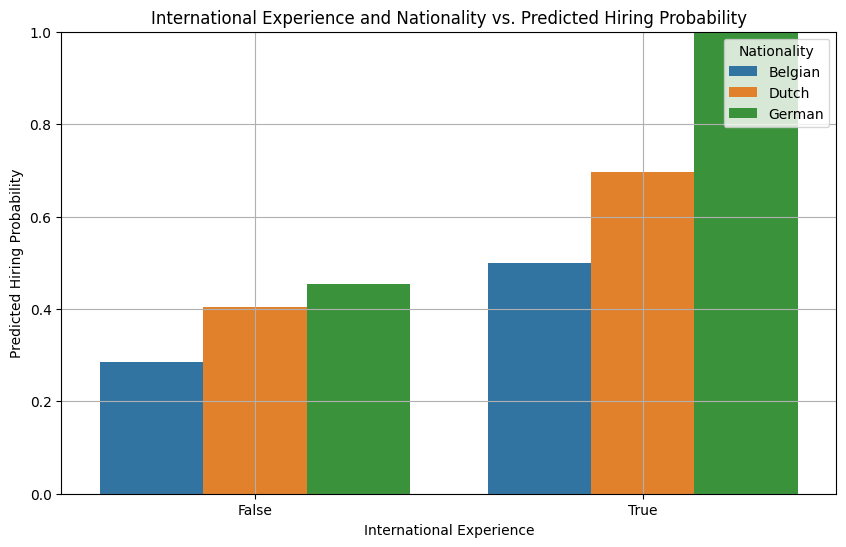

In [44]:
# Predicted hiring probability for different nationalities and international experience

hired_probability = X_test.groupby(['ind-international_exp', 'nationality'])['predicted'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='ind-international_exp', y='predicted', hue='nationality', data=hired_probability)
plt.title('International Experience and Nationality vs. Predicted Hiring Probability')
plt.xlabel('International Experience')
plt.ylabel('Predicted Hiring Probability')
plt.legend(title='Nationality', loc='upper right')
plt.ylim(0, 1.0)
plt.grid(True)
plt.show()

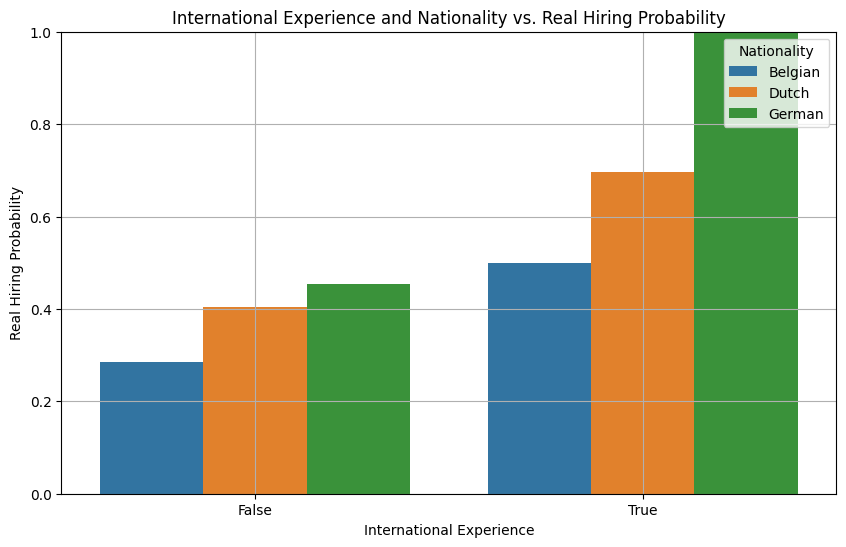

In [45]:
# Real hiring probability for different nationalities and international experience

hired_probability = X_test.groupby(['ind-international_exp', 'nationality'])['real'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='ind-international_exp', y='real', hue='nationality', data=hired_probability)
plt.title('International Experience and Nationality vs. Real Hiring Probability')
plt.xlabel('International Experience')
plt.ylabel('Real Hiring Probability')
plt.legend(title='Nationality', loc='upper right')
plt.ylim(0, 1.0)
plt.grid(True)
plt.show()

Text(0.5, 0.98, 'Model performance for subgroups based on nationality (Dutch, German, Belgian) and gender (Male, Female, Other)')

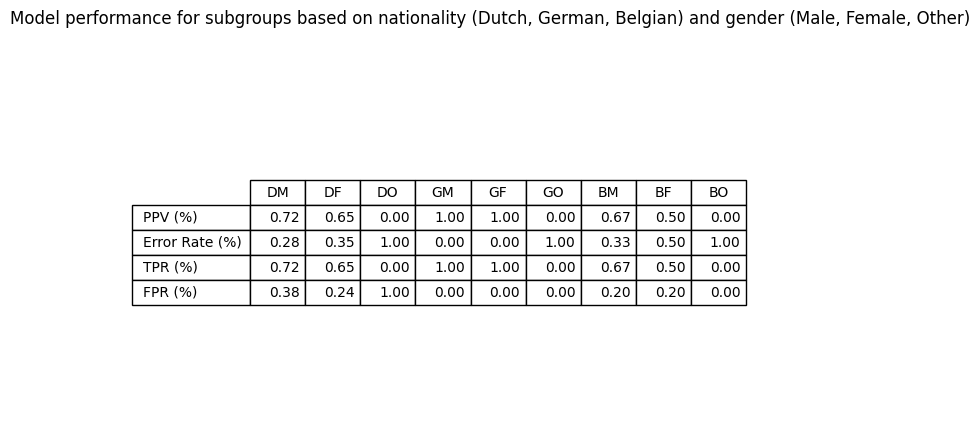

In [47]:
## Table: PPV, Error Rate, TPR & FPR on different subgroups (gender, nationality)


# Some things for the table

columns = ["DM", "DF", "DO", "GM", "GF", "GO", "BM", "BF", "BO"]
rows = ["PPV (%)", "Error Rate (%)", "TPR (%)", "FPR (%)"]


# Getting the data to fill in the table

data = [[],[],[],[]]
for nationality in ["Dutch", "German", "Belgian"]:
    for gender in ["male", "female", "other"]:
        # getting the subgroup
        subgroup = X_test[(X_test['nationality'] == nationality) & (X_test['gender'] == gender)]
        # PPV = Positive Prediction Rate
        if len(subgroup[subgroup["real"] == True]) == 0:
            PPV = 0.0
        else:
            PPV = len(subgroup[(subgroup["real"] == True) & (subgroup["predicted"] == True)]) / len(subgroup[subgroup["real"] == True])
        data[0].append(PPV)
        # Error Rate = 1 - PPV
        data[1].append(1-PPV)
        # TPR = True Positive Rate
        TP = len(subgroup[(subgroup["real"] == True) & (subgroup["predicted"] == True)])
        FN = len(subgroup[(subgroup["real"] == True) & (subgroup["predicted"] == False)])
        TPR = 0.0 if TP + FN == 0 else TP / (TP + FN)
        data[2].append(TPR)
        # FPR = False Positive Rate
        FP = len(subgroup[(subgroup["real"] == False) & (subgroup["predicted"] == True)])
        TN = len(subgroup[(subgroup["real"] == False) & (subgroup["predicted"] == False)])
        FPR = 0.0 if FP + TN == 0 else FP / (FP + TN)
        data[3].append(FPR)

        
# Formatting the data matrix

formatted = []
for row in data:
    formatted.append([f'{x:.2f}' for x in row])

    
# The Table

plt.figure(linewidth=2)
table = plt.table(cellText = formatted, rowLabels = rows, colLabels = columns, loc = 'center')
table.scale(1, 1.5)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
plt.suptitle("Model performance for subgroups based on nationality (Dutch, German, Belgian) and gender (Male, Female, Other)")

Text(0.5, 0.98, 'Model performance for subgroups based on sport (Football) and age (from 21 to 32)')

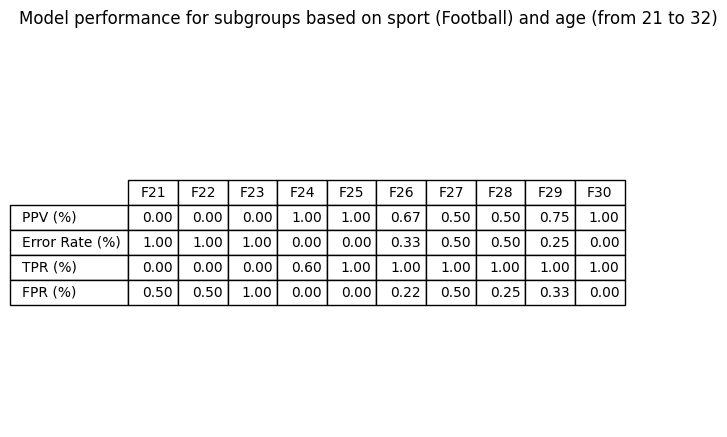

In [48]:
## Table 1: PPV, Error Rate, TPR & FPR on sport & age subgroups:
## -> 1) Football


# Some things for the table

columns = [f"F{age}" for age in range (21,33)]

rows = ["PPV (%)", "Error Rate (%)", "TPR (%)", "FPR (%)"]


# Getting the data to fill in the table

index = 0
data = [[],[],[],[]]
for age in range(21,33):
    # getting the subgroup
    subgroup = X_test[(X_test['sport'] == 'Football') & (X_test['age'] == age)]
    if len(subgroup) == 0:
        columns.pop(index)
        index -= 1
    else:
        # True/False Positives/Negatives
        TP = len(subgroup[(subgroup["real"] == True) & (subgroup["predicted"] == True)])
        FP = len(subgroup[(subgroup["real"] == False) & (subgroup["predicted"] == True)])
        FN = len(subgroup[(subgroup["real"] == True) & (subgroup["predicted"] == False)])
        TN = len(subgroup[(subgroup["real"] == False) & (subgroup["predicted"] == False)])
        # PPV = Positive Prediction Rate
        PPV = 0.0 if TP + FP == 0 else TP / (TP + FP)
        data[0].append(PPV)
        # Error Rate = 1 - PPV
        data[1].append(1-PPV)
        # TPR = True Positive Rate
        TPR = 0.0 if TP + FN == 0 else TP / (TP + FN)
        data[2].append(TPR)
        # FPR = False Positive Rate
        FPR = 0.0 if FP + TN == 0 else FP / (FP + TN)
        data[3].append(FPR)
    index += 1
        
# Formatting the data matrix

formatted = []
for row in data:
    formatted.append([f'{x:.2f}' for x in row])

    
# The Table

plt.figure(linewidth=2)
table = plt.table(cellText = formatted, rowLabels = rows, colLabels = columns, loc = 'center')
table.scale(1, 1.5)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
plt.suptitle("Model performance for subgroups based on sport (Football) and age (from 21 to 32)")

Text(0.5, 0.98, 'Model performance for subgroups based on sport (Golf) and age (from 21 to 32)')

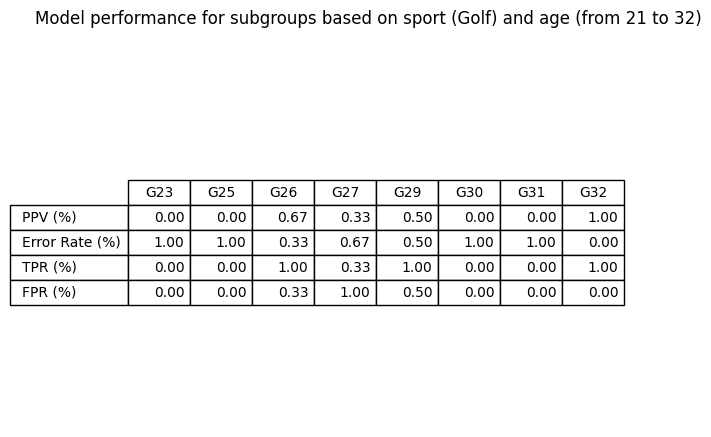

In [49]:
## Table 2: PPV, Error Rate, TPR & FPR on sport & age subgroups:
## -> 2) Golf


# Some things for the table

columns = [f"G{age}" for age in range (21,33)]

rows = ["PPV (%)", "Error Rate (%)", "TPR (%)", "FPR (%)"]


# Getting the data to fill in the table

data = [[],[],[],[]]
index = 0
for age in range(21,33):
    # getting the subgroup
    subgroup = X_test[(X_test['sport'] == 'Golf') & (X_test['age'] == age)]
    if len(subgroup) == 0:
        columns.pop(index)
        index -= 1
    else:
        # True/False Positives/Negatives
        TP = len(subgroup[(subgroup["real"] == True) & (subgroup["predicted"] == True)])
        FP = len(subgroup[(subgroup["real"] == False) & (subgroup["predicted"] == True)])
        FN = len(subgroup[(subgroup["real"] == True) & (subgroup["predicted"] == False)])
        TN = len(subgroup[(subgroup["real"] == False) & (subgroup["predicted"] == False)])
        # PPV = Positive Prediction Rate
        PPV = 0.0 if TP + FP == 0 else TP / (TP + FP)
        data[0].append(PPV)
        # Error Rate = 1 - PPV
        data[1].append(1-PPV)
        # TPR = True Positive Rate
        TPR = 0.0 if TP + FN == 0 else TP / (TP + FN)
        data[2].append(TPR)
        # FPR = False Positive Rate
        FPR = 0.0 if FP + TN == 0 else FP / (FP + TN)
        data[3].append(FPR)
    index += 1

        
# Formatting the data matrix

formatted = []
for row in data:
    formatted.append([f'{x:.2f}' for x in row])

    
# The Table

plt.figure(linewidth=2)
table = plt.table(cellText = formatted, rowLabels = rows, colLabels = columns, loc = 'center')
table.scale(1, 1.5)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
plt.suptitle("Model performance for subgroups based on sport (Golf) and age (from 21 to 32)")

Text(0.5, 0.98, 'Model performance for subgroups based on sport (Swimming) and age (from 21 to 32)')

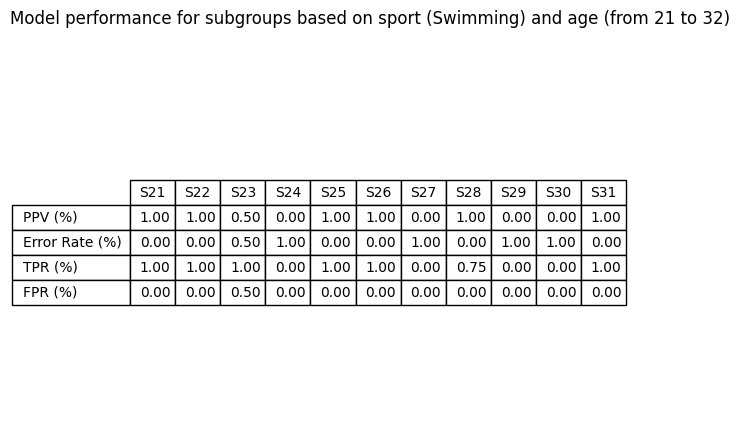

In [50]:
## Table 3: PPV, Error Rate, TPR & FPR on sport & age subgroups:
## -> 3) Swimming


# Some things for the table

columns = [f"S{age}" for age in range (21,33)]

rows = ["PPV (%)", "Error Rate (%)", "TPR (%)", "FPR (%)"]


# Getting the data to fill in the table

data = [[],[],[],[]]
index = 0
for age in range(21,33):
    # getting the subgroup
    subgroup = X_test[(X_test['sport'] == 'Swimming') & (X_test['age'] == age)]
    if len(subgroup) == 0:
        columns.pop(index)
        index -= 1
    else:
        # True/False Positives/Negatives
        TP = len(subgroup[(subgroup["real"] == True) & (subgroup["predicted"] == True)])
        FP = len(subgroup[(subgroup["real"] == False) & (subgroup["predicted"] == True)])
        FN = len(subgroup[(subgroup["real"] == True) & (subgroup["predicted"] == False)])
        TN = len(subgroup[(subgroup["real"] == False) & (subgroup["predicted"] == False)])
        # PPV = Positive Prediction Rate
        PPV = 0.0 if TP + FP == 0 else TP / (TP + FP)
        data[0].append(PPV)
        # Error Rate = 1 - PPV
        data[1].append(1-PPV)
        # TPR = True Positive Rate
        TPR = 0.0 if TP + FN == 0 else TP / (TP + FN)
        data[2].append(TPR)
        # FPR = False Positive Rate
        FPR = 0.0 if FP + TN == 0 else FP / (FP + TN)
        data[3].append(FPR)
    index += 1

        
# Formatting the data matrix

formatted = []
for row in data:
    formatted.append([f'{x:.2f}' for x in row])

    
# The Table

plt.figure(linewidth=2)
table = plt.table(cellText = formatted, rowLabels = rows, colLabels = columns, loc = 'center')
table.scale(1, 1.5)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
plt.suptitle("Model performance for subgroups based on sport (Swimming) and age (from 21 to 32)")

In [52]:
## Data for Bar Charts: Hiring Probability -> predicted & real

predicted = X_test.groupby(['age', 'sport'])['predicted'].mean().reset_index()
real = X_test.groupby(['age', 'sport'])['real'].mean().reset_index()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


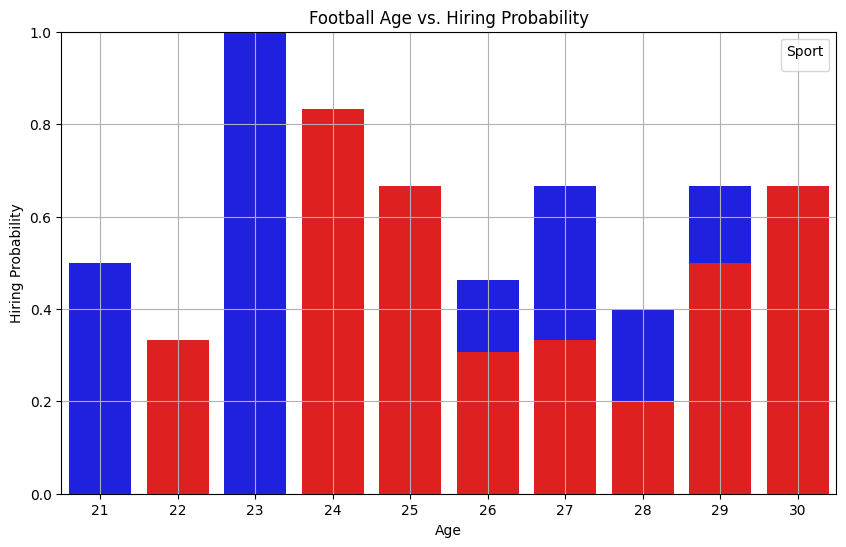

In [58]:
## Bar Chart: Real vs Predicted Hiring Probability of sports & age subgroups
## Only Predicted

'''
X axis: each subgroup has 2 columns (real & predicted)
Y axis: probability (real or predicted)
Color: for Real vs Predicted

'''



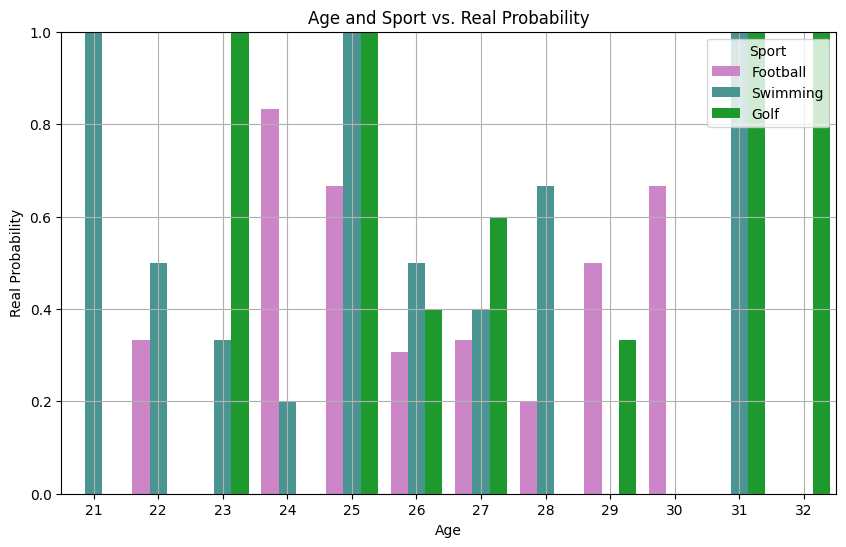

In [55]:
## Bar Chart: Real vs Predicted Hiring Probability of sports & age subgroups
## Only Real

'''
X axis: each subgroup has 2 columns (real & predicted)
Y axis: probability (real or predicted)
Color: for Real vs Predicted
'''

plt.figure(figsize=(10, 6))
custom_palette = {'Swimming': '#3EA19E', 'Football': '#D87AD3', 'Golf': '#09AD1D'}
sns.barplot(x='age', y='real', hue='sport', data=real, palette=custom_palette)
plt.title('Age and Sport vs. Real Probability')
plt.xlabel('Age')
plt.ylabel('Real Probability')
plt.legend(title='Sport', loc='upper right')
plt.ylim(0, 1.0)
plt.grid(True)
plt.show()